In [75]:
import pandas as pd
import matplotlib.pyplot as plt

In [76]:
df = pd.read_csv('https://raw.githubusercontent.com/zalig/cu-datasets/main/without_rules.csv')

In [77]:
df

,Id,Age,Gender,Subscription,Videos Watched
0,id1,25+,Male,B,7
1,id2,25+,Female,B,20
2,id3,<25,Female,A,178
3,id4,25+,Female,A,31
4,id5,25+,Female,A,36
...,...,...,...,...,...
995,id996,<25,Female,B,243
996,id997,<25,Male,A,159
997,id998,<25,Female,A,197
998,id999,<25,Female,B,179


In [78]:
df_A = df[df['Subscription'] == 'A'].sort_values(by='Videos Watched',ascending=True)
df_B = df[df['Subscription'] == 'B'].sort_values(by='Videos Watched', ascending=True)

df_A_wins = pd.concat([df_A.tail(200),
                      df_B.head(200)])
df_A_wins

,Id,Age,Gender,Subscription,Videos Watched
374,id375,<25,Female,A,155
371,id372,<25,Male,A,156
721,id722,<25,Female,A,156
213,id214,<25,Male,A,158
226,id227,<25,Female,A,158
...,...,...,...,...,...
975,id976,<25,Female,B,78
758,id759,<25,Female,B,78
242,id243,<25,Female,B,79
351,id352,<25,Female,B,80


In [79]:
df_B_wins = pd.concat([df_A.head(200),
                      df_B.tail(200)])

df_B_wins

,Id,Age,Gender,Subscription,Videos Watched
896,id897,25+,Male,A,0
274,id275,<25,Male,A,0
520,id521,25+,Male,A,0
348,id349,<25,Female,A,0
765,id766,25+,Male,A,0
...,...,...,...,...,...
319,id320,<25,Male,B,332
889,id890,<25,Male,B,338
114,id115,<25,Male,B,355
14,id15,<25,Male,B,392


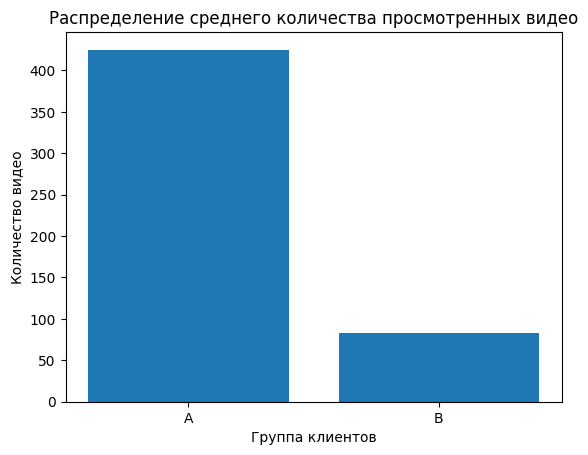

In [80]:
plt.bar(df_A_wins['Subscription'], df_A_wins['Videos Watched'])
plt.title('Распределение среднего количества просмотренных видео')
plt.xlabel('Группа клиентов')
plt.ylabel('Количество видео')
plt.show()

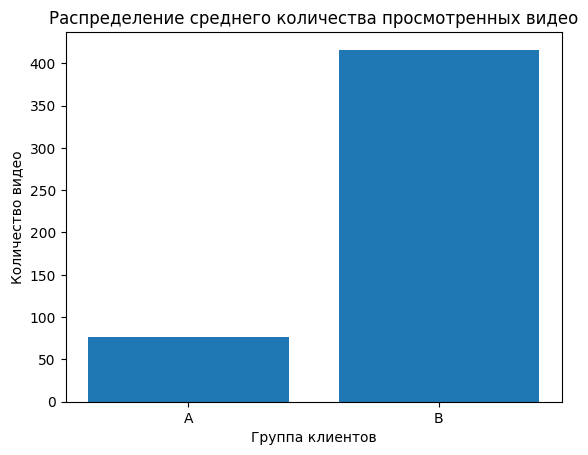

In [81]:
plt.bar(df_B_wins['Subscription'], df_B_wins['Videos Watched'])
plt.title('Распределение среднего количества просмотренных видео')
plt.xlabel('Группа клиентов')
plt.ylabel('Количество видео')
plt.show()

In [82]:
df['Selection Winner A'] = df['Id'].isin(df_A_wins['Id']).astype(int)
df['Selection Winner B'] = df['Id'].isin(df_B_wins['Id']).astype(int)

Красный

In [83]:
df_A_male_l25 = df[(df['Subscription'] == 'A') & (df['Gender'] == 'Male') & (df['Age'] == '<25')].sort_values(by='Videos Watched',ascending=True)
df_A_male_h25 = df[(df['Subscription'] == 'A') & (df['Gender'] == 'Male') & (df['Age'] == '25+')].sort_values(by='Videos Watched',ascending=True)
df_A_female_l25 = df[(df['Subscription'] == 'A') & (df['Gender'] == 'Female') & (df['Age'] == '<25')].sort_values(by='Videos Watched',ascending=True)
df_A_female_h25 = df[(df['Subscription'] == 'A') & (df['Gender'] == 'Female') & (df['Age'] == '25+')].sort_values(by='Videos Watched',ascending=True)

df_B_male_l25 = df[(df['Subscription'] == 'B') & (df['Gender'] == 'Male') & (df['Age'] == '<25')].sort_values(by='Videos Watched', ascending=True)
df_B_male_h25 = df[(df['Subscription'] == 'B') & (df['Gender'] == 'Male') & (df['Age'] == '25+')].sort_values(by='Videos Watched', ascending=True)
df_B_female_l25 = df[(df['Subscription'] == 'B') & (df['Gender'] == 'Female') & (df['Age'] == '<25')].sort_values(by='Videos Watched', ascending=True)
df_B_female_h25 = df[(df['Subscription'] == 'B') & (df['Gender'] == 'Female') & (df['Age'] == '25+')].sort_values(by='Videos Watched', ascending=True)

In [84]:
from math import ceil
p_m_l25 = df[(df['Gender'] == 'Male') & (df['Age'] == '<25')].shape[0] / df.shape[0]
p_m_h25 = df[(df['Gender'] == 'Male') & (df['Age'] == '25+')].shape[0] / df.shape[0]

p_f_l25 = df[(df['Gender'] == 'Female') & (df['Age'] == '<25')].shape[0] / df.shape[0]
p_f_h25 = df[(df['Gender'] == 'Female') & (df['Age'] == '25+')].shape[0] / df.shape[0]

n_m_l25 = ceil(p_m_l25 * 200)
n_m_h25 = ceil(p_m_h25 * 200)
n_f_l25 = ceil(p_f_l25 * 200)
n_f_h25 = ceil(p_f_h25 * 200)

df_A_wins = pd.concat([df_A_male_l25.tail(n_m_l25), df_A_male_h25.tail(n_m_h25),
                       df_A_female_l25.tail(n_f_l25), df_A_female_h25.tail(n_f_h25),

                       df_B_male_l25.head(n_m_l25), df_B_male_h25.head(n_m_h25),
                       df_B_female_l25.head(n_f_l25), df_B_female_h25.head(n_f_h25)])



pc_m_l25 = df_A_wins[(df_A_wins['Gender'] == 'Male') & (df_A_wins['Age'] == '<25')].shape[0] / df_A_wins.shape[0]
pc_m_h25 = df_A_wins[(df_A_wins['Gender'] == 'Male') & (df_A_wins['Age'] == '25+')].shape[0] / df_A_wins.shape[0]

pc_f_l25 = df_A_wins[(df_A_wins['Gender'] == 'Female') & (df_A_wins['Age'] == '<25')].shape[0] / df_A_wins.shape[0]
pc_f_h25 = df_A_wins[(df_A_wins['Gender'] == 'Female') & (df_A_wins['Age'] == '25+')].shape[0] / df_A_wins.shape[0]

print(pc_m_l25, pc_m_h25, pc_f_l25, pc_f_h25)
print(p_m_l25, p_m_h25, p_f_l25, p_f_h25)

0.29850746268656714 0.14427860696517414 0.3582089552238806 0.19900497512437812
0.3 0.14 0.36 0.2


In [85]:
mean_videos_watched = df_A_wins.groupby(['Age', 'Gender', 'Subscription'])['Videos Watched'].mean()

mean_videos_watched

Age  Gender  Subscription
25+  Female  A                41.425000
             B                17.450000
     Male    A                29.344828
             B                 9.620690
<25  Female  A               204.069444
             B                88.805556
     Male    A               269.833333
             B               145.400000
Name: Videos Watched, dtype: float64

In [95]:
procent_frame = pd.DataFrame({'Male_<25' : [pc_m_l25, p_m_l25],
                              'Male_25+': [pc_m_h25, p_m_h25],
                              'Female_<25': [pc_f_l25, p_f_l25],
                              'Female_25+': [pc_f_h25, p_f_h25]},
                             index=['Выборка', 'Генеральная совокупность']).style.format('{:.2f}').set_caption("Распределение пола и возраста в каждой из четырех выборок 200 участников")
procent_frame

,Male_<25,Male_25+,Female_<25,Female_25+
Выборка,0.30,0.14,0.36,0.20
Генеральная совокупность,0.30,0.14,0.36,0.20


In [98]:
df_B_wins = pd.concat([df_A_male_l25.head(n_m_l25), df_A_male_h25.head(n_m_h25),
                       df_A_female_l25.head(n_f_l25), df_A_female_h25.head(n_f_h25),

                       df_B_male_l25.tail(n_m_l25), df_B_male_h25.tail(n_m_h25),
                       df_B_female_l25.tail(n_f_l25), df_B_female_h25.tail(n_f_h25)])

mean_videos_watched = df_B_wins.groupby(['Age', 'Gender', 'Subscription'])['Videos Watched'].mean()

mean_videos_watched

Age  Gender  Subscription
25+  Female  A                17.800000
             B                41.875000
     Male    A                11.448276
             B                30.517241
<25  Female  A                93.500000
             B               209.291667
     Male    A               132.216667
             B               271.766667
Name: Videos Watched, dtype: float64